# Removing bias enables generalization

In this notebook, we examine generalization of denoising performance to noise levels beyond those used during training.  We compare generalization capabilities of a given model (e.g. DnCNN), and its bias free version (e.g. BF_DnCNN).  We show that performance of the two models is similar within the training range, but that the bias-free network is substantially better outside the training range.


In [1]:
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import torch
import torch.nn as nn

import os
import sys  

from utils import *


%matplotlib inline

In [2]:
# Paths for data, pretrained models, and precomputed performance measures
pretrained_base = './pretrained/'
precomputed_base = './precomputed/'
data_base = 'data/'

# Datasets available in the data folder
train_folder_path = os.path.join(data_base, 'Train400/')
test_folder_path = os.path.join(data_base, 'Test/Set68/')
set12_path = os.path.join(data_base, 'Test/Set12/')
kodak_path = os.path.join(data_base, 'Test/Kodak23/') 

### Choose a model 

Both the original model, and its bias-free counterpart, will be loaded. You can train and use any other model using the train script provided in the repository. 

In [3]:
# Choose a model to load (options are: 'dncnn', 'unet', 'rcnn', 'sdensenet')
model = 'dncnn' 

# Select the range of training noise levels (stdev, relative to intensity range [0,255]). 
# Pre-computed options are 0-10, 0-30, 0-55, 0-100.
min_noise = 0   # lower bound of training range 
max_noise = 10  # upper bound of training range 

### Display a randomly selected set of 4 noisy images used during training of this model 


/home/sm7582/condaenvs/denoising/lib/python3.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


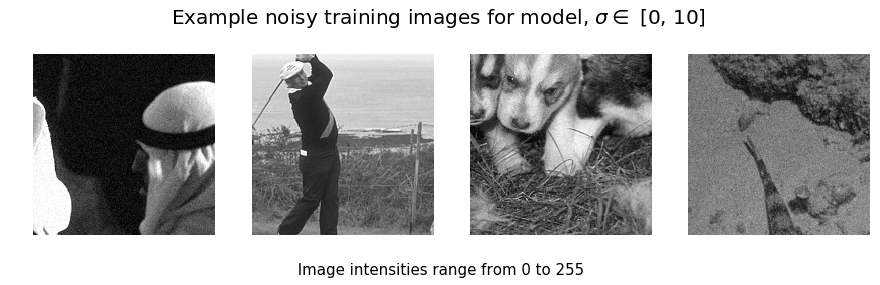

In [4]:
f, axs = plt.subplots(1,4, figsize = (15,4), squeeze=True)
f.suptitle(r'Example noisy training images for model, $\sigma \in$ [' + str(min_noise) +', '+ str(max_noise) +']',  fontname= 'Times New Roman', fontsize = 20)
f.text(.5, .05, ' Image intensities range from 0 to 255',ha='center',  fontname= 'Times New Roman', fontsize = 15)
for i in range(4): 
    tr_im_n = np.random.randint(0,len(os.listdir(train_folder_path)))
    tr_im = single_image_loader(train_folder_path, tr_im_n)
    tr_dim1, tr_dim2 = tr_im.shape
    tr_noisy, _ = add_noise2(tr_im.reshape(1,tr_dim1,tr_dim2), [min_noise,max_noise], 'B') 
    tr_noisy = tr_noisy.reshape(tr_dim1,tr_dim2)
    axs[i].imshow(tr_noisy, 'gray', vmin= 0, vmax = 1)
    axs[i].axis('off');

In [5]:
# Load pre-trained models
CNN = load_model(os.path.join(pretrained_base, model, 'bias', str(min_noise)+'-'+str(max_noise)+'.pt'))
BF_CNN = load_model(os.path.join(pretrained_base, model, 'bias_free', str(min_noise)+'-'+str(max_noise)+'.pt'))

## 1. Performance comparison on a single image 

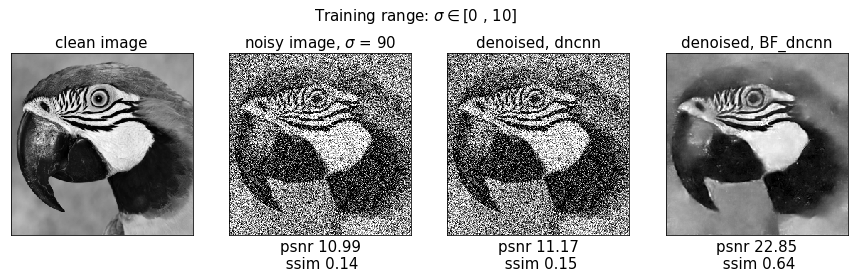

In [6]:
# Denoise a noisy image (specify image by image_num, noise stdev by noise_level)
display_denoising(CNN, BF_CNN, set12_path, l = min_noise, h = max_noise, model = model,
                  image_num = 6, noise_level = 90);


## 2. Performance comparison over many images

The following plots show output quality as a function of input quality for the CNN and BF_CNN models. The vertical blue band indicates the training range.  Quality values are expressed using PSNR (left) and SSIM (right), and are pre-computed. If you want to re-compute these (for example, on another dataset, or for a new model), set USE_PRECOMPUTED_METRICS to False (note: this may be SLOW on a CPU). 


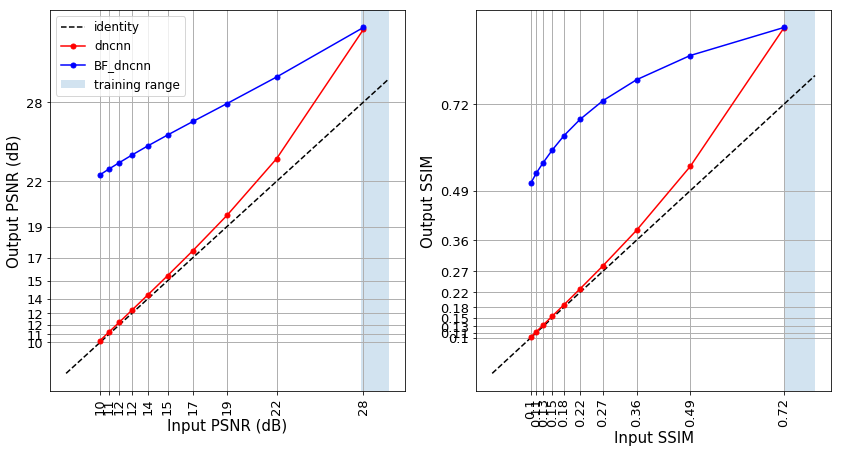

In [7]:
USE_PRECOMPUTED_METRICS = True

# specify model and training range [min_noise max_noise].  
compute_and_plot_performance_plot(model, min_noise, max_noise, pretrained_base,precomputed_base, USE_PRECOMPUTED_METRICS)
